Dataset available at [here](https://github.com/sachinmotwani20/Basic-Machine-Learning-Python/blob/master/DataSets/bikeshare.csv)



#Introduction to Machine Learning

In [0]:
import numpy as np #For numerical operations on data
import pandas as pd #Used for Data Processing & Understanding

In [2]:
df=pd.read_csv("bikeshare.csv") #Reading the CSV File
print (df) 

                  datetime  season  holiday  ...  casual  registered  count
0      2011-01-01 00:00:00       1        0  ...       3          13     16
1      2011-01-01 01:00:00       1        0  ...       8          32     40
2      2011-01-01 02:00:00       1        0  ...       5          27     32
3      2011-01-01 03:00:00       1        0  ...       3          10     13
4      2011-01-01 04:00:00       1        0  ...       0           1      1
...                    ...     ...      ...  ...     ...         ...    ...
10881  2012-12-19 19:00:00       4        0  ...       7         329    336
10882  2012-12-19 20:00:00       4        0  ...      10         231    241
10883  2012-12-19 21:00:00       4        0  ...       4         164    168
10884  2012-12-19 22:00:00       4        0  ...      12         117    129
10885  2012-12-19 23:00:00       4        0  ...       4          84     88

[10886 rows x 12 columns]


In [3]:
print(df.isna()) #Check for any Null values

       datetime  season  holiday  ...  casual  registered  count
0         False   False    False  ...   False       False  False
1         False   False    False  ...   False       False  False
2         False   False    False  ...   False       False  False
3         False   False    False  ...   False       False  False
4         False   False    False  ...   False       False  False
...         ...     ...      ...  ...     ...         ...    ...
10881     False   False    False  ...   False       False  False
10882     False   False    False  ...   False       False  False
10883     False   False    False  ...   False       False  False
10884     False   False    False  ...   False       False  False
10885     False   False    False  ...   False       False  False

[10886 rows x 12 columns]


Null values are critical for analysing how the data should be preprocessed and generally reflects the incompetencies of data collection techniques.

In [4]:
df.isna().sum() #Gives the total numbers of null values in each column

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.isna().any() #Is there any null value in any column at all?

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [6]:
df.dtypes #understanding the need of converting characters to machine processable values

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
df.head() #First 5 rows of the dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
#import matplotlib as npl 
import matplotlib.pyplot as plt #Used for plotting the data in various forms

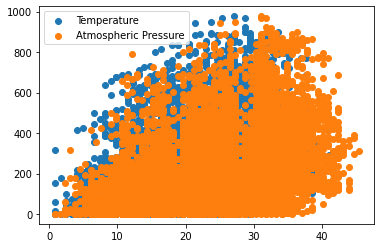

In [9]:
plt.scatter(df["temp"],df["count"], label= 'Temperature')
plt.scatter(df["atemp"],df["count"],label = 'Atmospheric Pressure')
plt.legend()
plt.show()

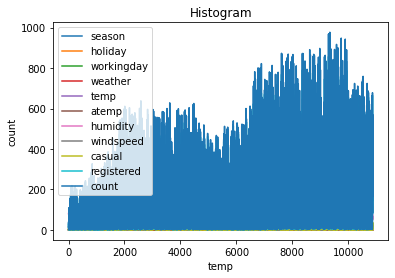

In [10]:
df.plot() #Plotting Dataframe as Histogram(default)
plt.title('Histogram')
plt.ylabel('count')
plt.xlabel('temp')
plt.show()

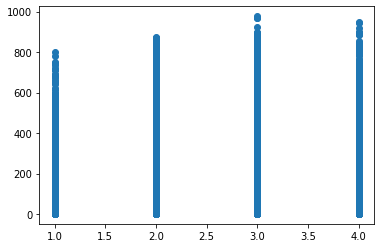

season


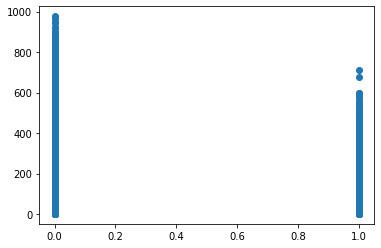

holiday


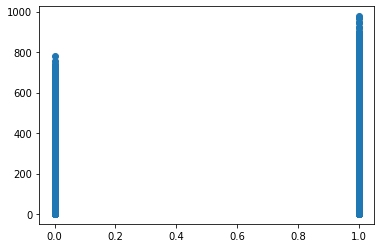

workingday


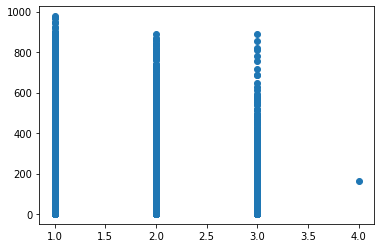

weather


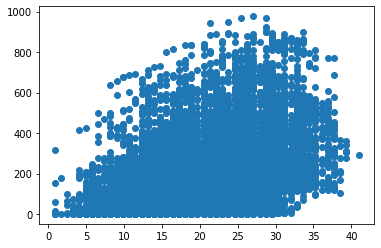

temp


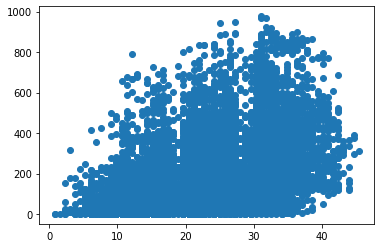

atemp


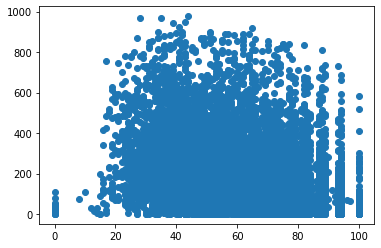

humidity


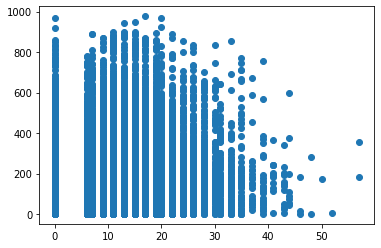

windspeed


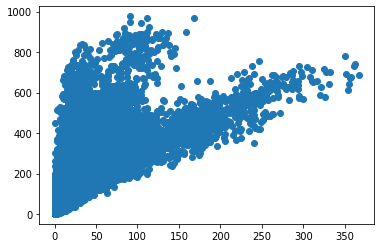

casual


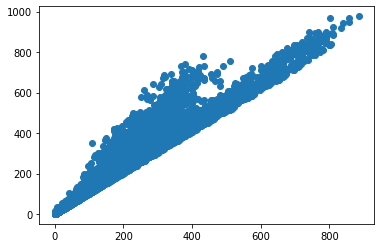

registered


In [11]:
for i in df.columns[1:-1]:
    plt.scatter (df[i], df["count"])
    plt.show()
    print(i)

We are able to distinguish between continuous & discrete data.

In [0]:
from sklearn.linear_model import LinearRegression #To apply Linear Regression
from sklearn.model_selection import train_test_split #To split the data into train & test data

In [0]:
y=df["count"].values
x=df[["registered", "casual"]]
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state = 1) #the random_state is the seed used by the random number generator

In [14]:
regressor= LinearRegression()

regressor.fit(x_train,y_train) #Training my model
predicted_values=regressor.predict(x_test) #Testing values: predicting y_test 

from sklearn import metrics  #To estimate the error in prediction
mean_squared_error1=metrics.mean_squared_error(y_test, predicted_values)
print(mean_squared_error1)
print(y_test)
print(predicted_values)

2.5463208655480094e-27
[308  14 539 ...  24  14   8]
[308.  14. 539. ...  24.  14.   8.]


We understand that the predicted values are Float while the actual values are Int. Hence we try to reduce error; as a smaller MSE means that our data values are dispersed closely to its central moment (mean)

In [15]:
regressor1= LinearRegression()

regressor1.fit(x_train,y_train) #Training my model
predicted_values1=list(map(int, regressor.predict(x_test))) #Testing values: predicting y_test 

mean_squared_error1=metrics.mean_squared_error(y_test, predicted_values1)
print(mean_squared_error1)
print(y_test)
print(predicted_values1)

0.24210139603232916
[308  14 539 ...  24  14   8]
[307, 14, 538, 143, 1, 249, 76, 481, 259, 167, 13, 148, 108, 4, 87, 12, 294, 71, 12, 96, 176, 69, 492, 69, 53, 300, 230, 217, 295, 24, 179, 380, 53, 24, 646, 145, 74, 3, 55, 71, 30, 116, 138, 36, 54, 497, 3, 10, 29, 167, 35, 288, 36, 215, 197, 4, 150, 144, 17, 130, 8, 208, 300, 194, 4, 82, 413, 44, 56, 20, 103, 117, 574, 202, 7, 108, 916, 114, 287, 193, 289, 136, 15, 156, 3, 170, 406, 30, 77, 394, 274, 140, 294, 39, 145, 137, 566, 2, 3, 166, 457, 320, 362, 4, 19, 597, 299, 135, 16, 8, 513, 284, 98, 96, 10, 458, 220, 27, 5, 369, 591, 851, 108, 30, 21, 8, 614, 297, 164, 167, 220, 4, 191, 304, 280, 1, 184, 206, 225, 436, 257, 19, 24, 109, 208, 165, 152, 321, 5, 206, 296, 60, 148, 190, 480, 3, 190, 855, 362, 177, 266, 264, 338, 3, 71, 133, 4, 235, 208, 146, 190, 510, 14, 280, 216, 391, 89, 166, 108, 40, 7, 6, 6, 331, 288, 87, 115, 85, 9, 273, 243, 595, 538, 6, 5, 9, 175, 116, 134, 482, 233, 306, 228, 61, 270, 12, 50, 193, 657, 124, 609, 109

We MSE is resuced i.e, we got better results.

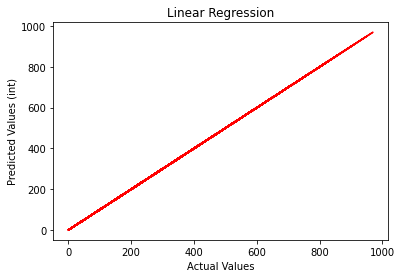

In [16]:
plt.plot(y_test, predicted_values1, 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (int)')
plt.title('Linear Regression')
plt.show()

Visual description of actual vs predicted values.